Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import Dataset

In [11]:
df = pd.read_csv('C:/Users/kwdam/Documents/Covid_Cases/covid-variants.csv')

Snapshot of the Dataset

In [9]:
df.head(10)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
5,Angola,2020-07-06,B.1.177,0,0.0,3
6,Angola,2020-07-06,B.1.221,0,0.0,3
7,Angola,2020-07-06,B.1.258,0,0.0,3
8,Angola,2020-07-06,B.1.367,0,0.0,3
9,Angola,2020-07-06,B.1.620,0,0.0,3


Checking for Completeness of Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


General Stats of the Dataset

In [12]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [33]:
df.groupby(df['location'])['num_sequences_total'].sum().sort_values(ascending=False).head(5)

location
United States     49960248
United Kingdom    37427568
Germany            7851432
Denmark            6728880
Canada             4365240
Name: num_sequences_total, dtype: int64

In [34]:
top_countries = ['United States', 'United Kingdom', 'Germany', 'Denmark', 'Canada']

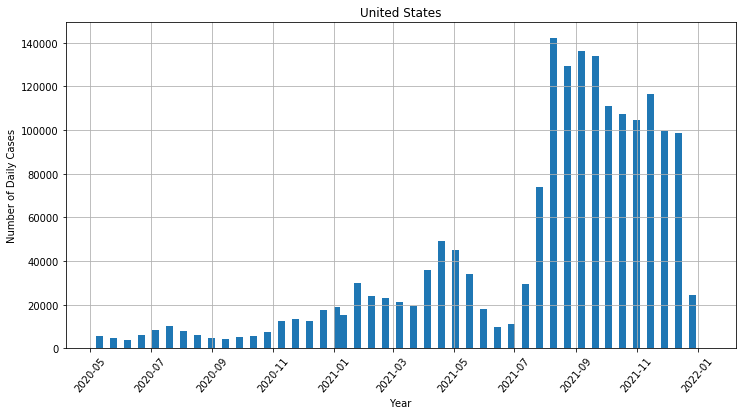

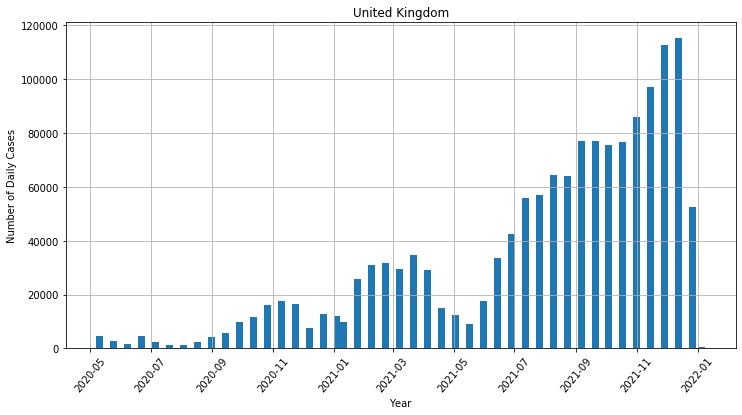

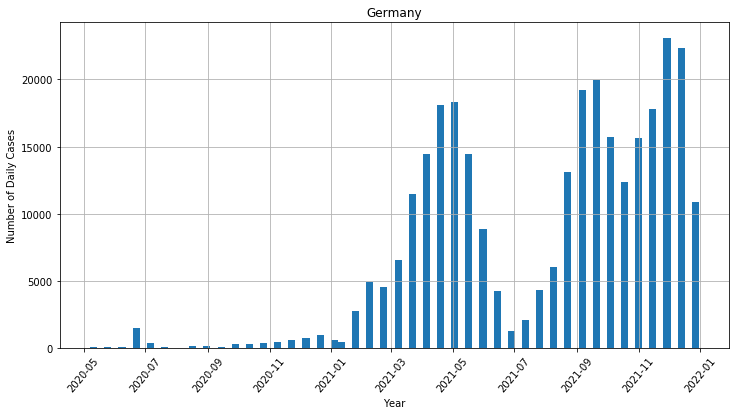

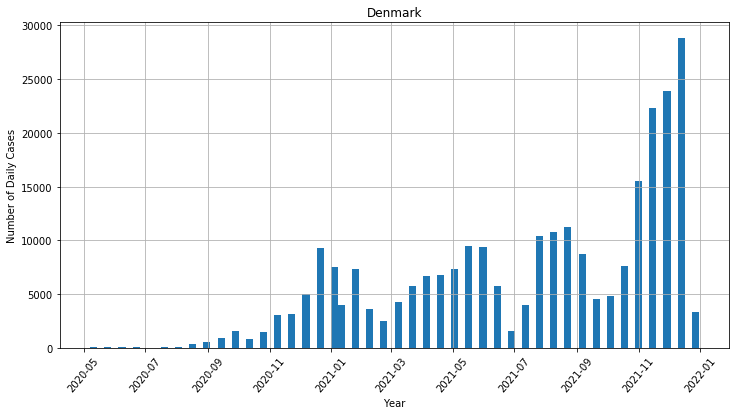

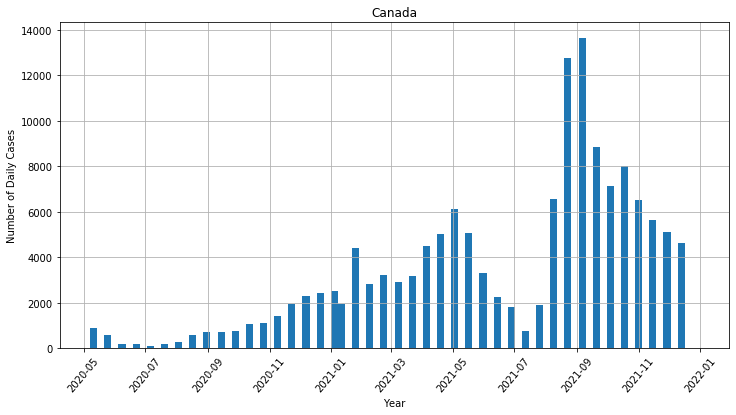

In [57]:
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'])
for country in top_countries:
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.bar(df[(df['location']==country)]['date'], df[(df['location']==country)]['num_sequences'], 
            width = 7)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=50)
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Number of Daily Cases')
    plt.grid()
    
# We can see the steady increase in 2021 with a huge spike at the end of the year for the 2nd wave
# when more tests became available


In [69]:
variant_cases_by_country = pd.pivot_table(df,'num_sequences','location','variant',aggfunc='sum')
variant_cases_by_country
# Creating a pivot table to better visualize the sum of cases by country and variant

variant,Alpha,B.1.1.277,B.1.1.302,B.1.1.519,B.1.160,B.1.177,B.1.221,B.1.258,B.1.367,B.1.620,...,Gamma,Iota,Kappa,Lambda,Mu,Omicron,S:677H.Robin1,S:677P.Pelican,non_who,others
location,,,,,,,,,,,,,,,,,,,,,
Angola,156,0,0,0,3,4,0,1,0,2,...,1,0,6,0,0,0,0,0,270,260
Argentina,366,0,0,46,0,0,0,1,0,0,...,2859,21,0,1109,26,93,0,0,2278,2231
Aruba,551,0,0,27,0,18,2,0,0,0,...,123,102,0,2,95,0,2,0,302,253
Australia,613,0,0,6,20,41,7,15,0,0,...,8,5,156,1,1,1693,2,2,15469,15376
Austria,3563,5,0,0,349,216,24,414,1,0,...,34,2,1,0,49,34,0,0,2047,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,239829,0,0,13136,73,282,20,87,0,26,...,28733,41720,333,1254,6041,28536,6449,4783,339081,314225
Uruguay,0,0,0,0,0,10,0,0,0,0,...,174,0,0,1,0,0,0,0,507,497
Vietnam,11,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,6,5


In [73]:
covid_variant = ['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who']

for var in covid_variant:
    print(f'Top 10 Countries with variant {var} : \n {variant_cases_by_country[var].sort_values(ascending=False)[:10]}\n')

Top 10 Countries with variant Alpha : 
 location
United Kingdom    262781
United States     239829
Germany           104138
Sweden             68608
Denmark            63798
Japan              49841
Canada             34985
France             32651
Netherlands        29670
Italy              26877
Name: Alpha, dtype: int64

Top 10 Countries with variant B.1.1.277 : 
 location
Denmark           545
Norway            242
United Kingdom    183
Poland             33
Iceland            30
Czechia            27
Germany            26
Switzerland        16
Hungary            14
Sweden             13
Name: B.1.1.277, dtype: int64

Top 10 Countries with variant B.1.1.302 : 
 location
Sweden             279
Denmark            121
Norway              37
Latvia              26
United Kingdom      21
Finland              1
Japan                1
Pakistan             0
North Macedonia      0
Oman                 0
Name: B.1.1.302, dtype: int64

Top 10 Countries with variant B.1.1.519 : 
 location
Uni